In [1]:
import numpy as np
from scipy.constants import c, h, k
import matplotlib.pyplot as plt

In [2]:
def plank_function(wavelength, temperature):
    x = h * c / (wavelength * k * temperature)
    return 2 * np.pi * c**2 * h/ (wavelength**5) * 1/(np.exp(x) - 1)

In [3]:
def angle_to_n(angle):
    return np.sqrt((2 / np.sqrt(3) * np.sin(angle) + 1/2)**2 + 3/4)

In [4]:
def n_to_lambda(n):
    A = -49852133
    B = 86092018.9
    C = -29983328.35
    D = -14354236.56
    E = 835425.05
    F = 5647432.02
    G = 1863438.86
    H = -2719226.18
    I = 574967.82
    lambda_nm = 3000 / np.sqrt(np.polyval([I, H, G, F, E, D, C, B, A], n))
    return lambda_nm * 1e-9

In [5]:
def stuff(temperature):
    angle = np.linspace(90, 55, 1000) * 2 * np.pi / 360
    angle_offset = np.random.normal(0, np.random.uniform(1e-4, 5e-4), len(angle))

    angle_err = angle - np.cumsum(angle_offset)

    n_err = angle_to_n(angle_err)
    wavelength_err = n_to_lambda(n_err)

    n = angle_to_n(angle)
    wavelength = n_to_lambda(n)

    # radiance_err = plank_function(wavelength_err, temperature) + np.random.normal(0, 0.004, len(wavelength))
    radiance_err = plank_function(wavelength_err, temperature)
    radiance = plank_function(wavelength, temperature)

    return (wavelength, radiance, radiance_err)
 
    # return (wavelength_max, wavelength_max_err)

In [6]:
def calc_area(x, y):
    y_av = np.array([(y[i] + y[i+1])/2 for i in range(len(y) - 1)])
    dx = np.diff(x)
    return y_av @ dx

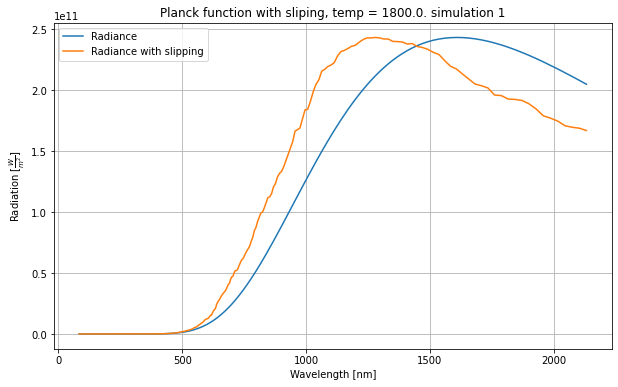

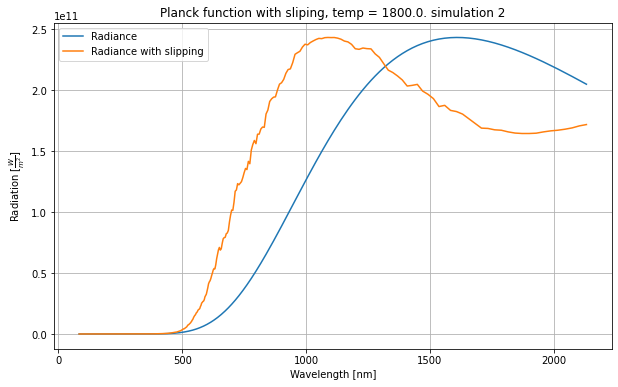

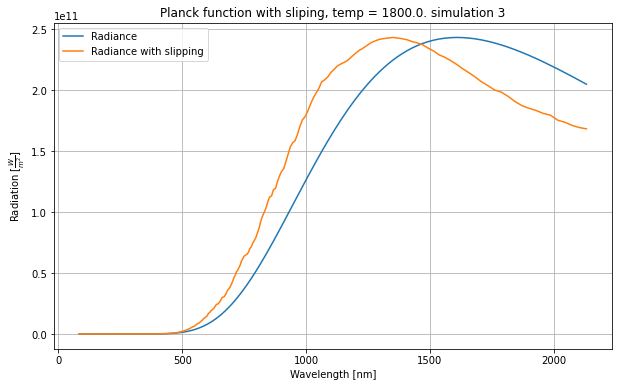

In [7]:
temperature = np.array([1800.0, 2000.0, 2200.0, 2400.0, 2600.0, 2800.0, 3000.0])
wavelength_max = np.zeros([3, len(temperature)])
wavelength_max_err = np.zeros([3, len(temperature)])
areas = np.zeros([3, len(temperature)])
areas_err = np.zeros([3, len(temperature)])
for j in range(3):
    for i, t in enumerate(temperature):
        wavelength, radiance, radiance_err = stuff(t)
        wavelength_max[j, i] = wavelength[np.argmax(radiance)]
        wavelength_max_err[j, i] = wavelength[np.argmax(radiance_err)]
        
        if i == 0:
            plt.figure(f'{i}', figsize=(10, 6))
            plt.title(f'Planck function with sliping, temp = {t}. simulation {j+1}')
            plt.plot(wavelength*10**9, radiance, label="Radiance")
            plt.plot(wavelength*10**9, radiance_err, label="Radiance with slipping")
            plt.legend()
            plt.grid()
            plt.xlabel('Wavelength [nm]')
            plt.ylabel('Radiation [$\\frac{W}{m^2}$]')
            plt.show()
        areas[j, i] = calc_area(wavelength, radiance)
        areas_err[j, i] = calc_area(wavelength, radiance_err)



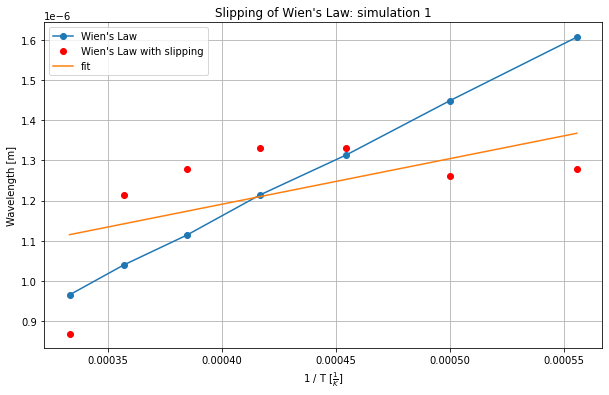

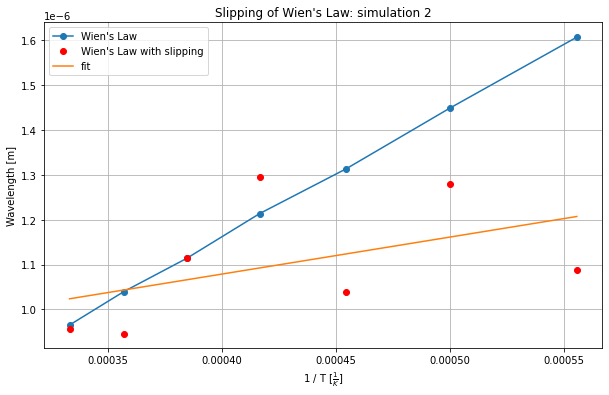

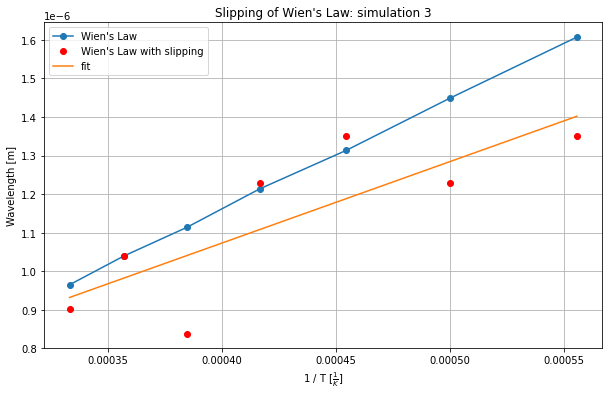

In [12]:
for i in range(3):
    [a, b] = np.polyfit(1 / temperature, wavelength_max_err[i], 1)
    plt.figure(f'{i}', figsize=(10, 6))
    # plt.title(f"Slipping of Wien's Law: {a:.2e} * 1 / T + {b:.2e}. simulation {i+1}")
    plt.title(f"Slipping of Wien's Law: simulation {i+1}")
    plt.plot(1 / temperature, wavelength_max[i],'-o', label="Wien's Law")
    plt.plot(1/ temperature, wavelength_max_err[i],'o', label="Wien's Law with slipping", color='red')
    plt.plot(1/temperature, a/temperature + b, label='fit')
    plt.xlabel('1 / T [$\\frac{1}{K}$]')
    plt.ylabel('Wavelength [m]')
    plt.legend(loc=2)
    plt.grid()
    plt.show()

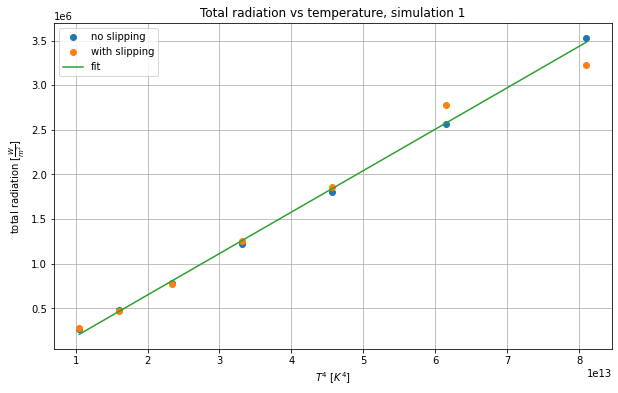

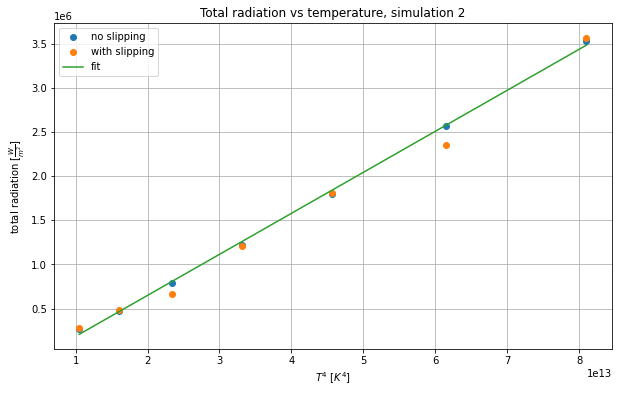

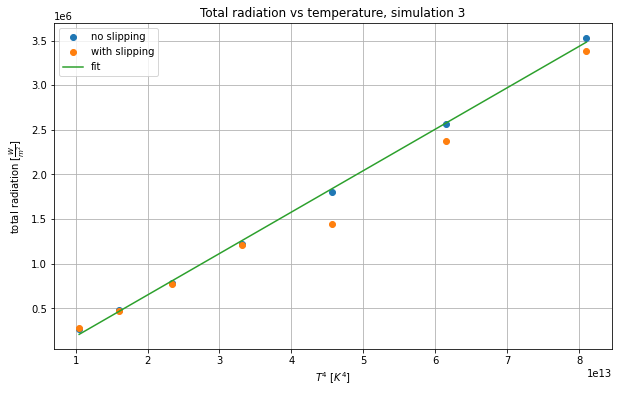

In [14]:
for i in range(3):
    plt.figure(f'a {i}', figsize=(10, 6))
    [a, b] = np.polyfit(temperature**4, areas[i], 1)
    plt.title(f'Total radiation vs temperature, simulation {i+1}')
    plt.plot(temperature**4, areas[i],'o', label='no slipping')
    plt.plot(temperature**4, areas_err[i],'o', label='with slipping')
    plt.plot(temperature**4, a*temperature**4 + b, label='fit')
    plt.legend()
    plt.xlabel('$T^4$ [$K^4$]')
    plt.ylabel('total radiation [$\\frac{W}{m^2}$]')
    plt.grid()
    plt.show()